In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import statistics
plt.rc('figure', facecolor='w', figsize=[4,3])

In [14]:
ksizes = list(map(int,"2 4 6 8 10 12 15".split()))

data_kminmers = []
for k in ksizes:
    mean = 0
    nb_items = 0
    nb_missing = 0
    for line in open(f"hifimap-k{k}-d0.01-l31.read_stats.abbrv.hist"):
        abundance,x= map(int,line.split())
        mean += abundance*x
        nb_items += abundance
        if x == 0: nb_missing=abundance
    mean /= nb_items
    data_kminmers += [(k,mean,nb_missing)]

    k  avg_nb_seed_hits  nb_missing
0   2          1.276203       25386
1   4          1.191199       18308
2   6          1.139491       20222
3   8          1.104420       28605
4  10          1.079784       36986
5  12          1.060359       45028
6  15          1.038874       63536


/home/rayan/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


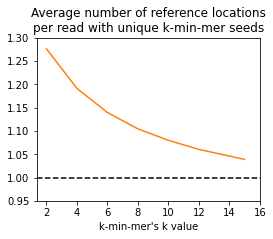

In [46]:
df = pd.DataFrame([x for x in data_kminmers],columns=("k","avg_nb_seed_hits","nb_missing"))

print(df)
sns_plot = sns.lineplot(df["k"], df["avg_nb_seed_hits"],color=sns.color_palette()[1])

#sns_plot.set(xscale="log")
sns_plot.set(xticks=[x for x in range(2,17,2)])
#sns_plot.set_xticklabels([str(int(x)) for x in range(2,19,2)])

#ylabels = ['{:}%'.format(int(x*100))  for x in sns_plot.get_yticks()]
#sns_plot.set_yticklabels(ylabels)

#plt.xticks(sns_plot.get_xticks(), list(map(lambda x:"%d"%x,sns_plot.get_xticks())))
sns_plot.set(xlabel="k-min-mer's k value", ylabel='')
#sns_plot.get_legend().remove()
plt.title('Average number of reference locations\nper read with unique k-min-mer seeds')
sns_plot.axhline(1, color='k', linestyle='--')
plt.ylim(0.95,1.3)

fig = sns_plot.get_figure()

"""
# create second Axes. Note the 0.0 height
ax2 = fig.add_axes((0.15,-0.1,0.72,0.0))
ax2.yaxis.set_visible(False) # hide the yaxis
new_tick_locations = np.array([0,.25, .5,.75,1])
def tick_function(X):
    ksizes = list(map(int," 2 4 6 8 10 12 15".split()))
    density=0.01
    return ["%d" % (ksizes[i]/density) for i,z in enumerate(X)]
ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels(tick_function(new_tick_locations))
ax2.set_xlabel("Equivalent k span in bases")
"""
plt.show()

fig.savefig("seeds_avg_hits_to_ref.pdf", bbox_inches='tight', dpi =300)
